# Parkinson's Disease - Hybrid Functional Petri Net (HFPN)
This script has implemented the following blocks of the HFPN for PD:
- [x] Cholesterol homeostasis
- [x] Calcium homeotasis
- [x] Energy metabolism
- [x] Lewy bodies formation

Implemented data and parameter optimisation
- [ ] Cholesterol homeostasis
- [x] Calcium homeotasis
- [ ] Energy metabolism
- [ ] Lewy bodies formation
- [ ] ER retraction

### Add your imports

In [1]:
import os
import sys

# Only run this cell once to avoid confusion with directories
# Point this to the directory where HFPN.py is relative to your working directory
cwd = os.getcwd() # Get current working directory
root_folder = os.sep + "team-project"
# Move to 'utils' from current directory position
sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "utils" + os.sep)

# Import HFPN class to work with hybrid functional Petri nets
from hfpn import HFPN

sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "parkinsons" + os.sep)
# Import initial token, firing conditions and rate functions
from initial_tokens import *
from rate_functions import *
from firing_conditions import *
from visualisation import Analysis

### Initialise an empty HFPN

In [2]:
# Initialize an empty HFPN
pn = HFPN(time_step = 0.3) #unit = s/A.U.

## Define the places by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Cholesterol homeostasis places

In [3]:
pn.add_place(it_p_chol_PM, "p_chol_PM","Chol - perinuclear region", continuous = True)
pn.add_place(it_p_chol_LE, "p_chol_LE", "Chol - late endosome", continuous = True)
pn.add_place(it_p_chol_ER, "p_chol_ER", "Chol - ER", continuous = True)
# pn.add_place(it_p_chol_extra, "p_chol_extra","Chol - extracellular", continuous = True)
pn.add_place(it_p_chol_mito, "p_chol_mito", "Chol - mitochondria", continuous = True)
pn.add_place(it_p_27OHchol_extra, "p_27OHchol_extra","27-OH chol - extracellular", continuous = True)
pn.add_place(it_p_27OHchol_intra, "p_27OHchol_intra","27-OH chol - intracellular", continuous = True)
pn.add_place(it_p_ApoEchol_extra, "p_ApoEchol_extra","ApoE - extracellular", continuous = True)
pn.add_place(it_p_ApoEchol_EE, "p_ApoEchol_EE","ApoE - Early endosome", continuous = True)
pn.add_place(it_p_7HOCA, "p_7HOCA","7-HOCA", continuous = True)
pn.add_place(it_p_preg,place_id="p_preg", label="Pregnenolon", continuous=True)
pn.add_place(it_p_24OHchol_extra,place_id="p_24OHchol_extra", label="24OHchol extra", continuous=True)
pn.add_place(it_p_24OHchol_intra,place_id="p_24OHchol_intra", label="24OHchol intra", continuous=True)

# PD specific places in cholesterol homeostasis
pn.add_place(it_p_GBA1, "p_GBA1","GBAl", continuous = False)
pn.add_place(it_p_ABCGA1, "p_ABCGA1", "ABG(C/G)A1", continuous = False)
pn.add_place(it_p_SNCA_act_extra, "p_SNCA_act_extra","a-synuclein - extracellular", continuous = True)
pn.add_place(it_p_SNCAApoEchol_extra, "p_SNCAApoEchol_extra","a-synuclein-ApoE complex - extracellular", continuous = True)
pn.add_place(it_p_SNCAApoEchol_intra, "p_SNCAApoEchol_intra","a-synuclein-ApoE complex - intracellular", continuous = True)

### Energy metabolism places

In [4]:
pn.add_place(it_p_ROS_mito, "p_ROS_mito", "ROS - mitochondria", continuous = True)
pn.add_place(it_p_H2O_mito, "p_H2O_mito", "H2O - mitochondria", continuous = True)
pn.add_place(it_p_reduc_mito, "p_reduc_mito", "Reducing agents - mitochondria", continuous = True)
pn.add_place(it_p_cas3, "p_cas3_mito","caspase 3 - mitochondria", continuous = True)
# pn.add_place(it_p_ETCmol, "p_ETCmol","lipid proteins in ETC", continuous = True)


### Calcium homeostasis places

In [5]:
pn.add_place(it_p_Ca_cyto, "p_Ca_cyto", "Ca - cytosole", continuous = True)
pn.add_place(it_p_Ca_mito, "p_Ca_mito","Ca - mitochondria", continuous = True)
pn.add_place(it_p_Ca_ER, "p_Ca_ER", "Ca - ER", continuous = True)
pn.add_place(it_p_ADP, "p_ADP","ADP - Calcium ER import", continuous = True)
pn.add_place(it_p_ATP, "p_ATP","ATP - Calcium ER import", continuous = True)

# Discrete on/of-switches calcium pacemaking

pn.add_place(1, "p_Ca_extra", "on1 - Ca - extracellular", continuous = False)
pn.add_place(0, "p_on2","on2", continuous = False)
pn.add_place(0, "p_on3","on3", continuous = False)
pn.add_place(0, "p_on4","on4", continuous = False)

### Lewy bodies pathology places

In [6]:
pn.add_place(it_p_SNCA_act, "p_SNCA_act","SNCA - active", continuous = True)
pn.add_place(it_p_VPS35, "p_VPS35", "VPS35", continuous = True)
pn.add_place(it_p_SNCA_inact, "p_SNCA_inact", "SNCA - inactive", continuous = True)
pn.add_place(it_p_SNCA_olig, "p_SNCA_olig", "SNCA - Oligomerised", continuous = True)
pn.add_place(it_p_LB, "p_LB", "Lewy body", continuous = True)
pn.add_place(it_p_Fe2, "p_Fe2", "Fe2 iron pool", continuous = True)

### Late endosome pathology places


In [7]:
pn.add_place(it_p_LRRK2_mut, "p_LRRK2_mut","LRRK2 - mutated", continuous = True)
pn.add_place(it_p_RTN3_axon, "p_RTN3_axon","ER tubules marker - axons", continuous = True)
pn.add_place(it_p_RTN3_PN, "p_RTN3_PN","ER tubules marker - PN", continuous = True)

## Define the transitions by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Cholesterol homeostasis transitions 

In [8]:
# Cholesterol Endocytosis
pn.add_transition_with_speed_function(
                transition_id				 = "t_LDLR_endocyto",
                label 						 = "LDLR endocyto",
                input_place_ids				 = ["p_ApoEchol_extra", "p_chol_ER","p_LB"],
                firing_condition			 = fc_t_LDLR_endocyto,
                reaction_speed_function		 = r_t_LDLR_endocyto, 
                consumption_coefficients	 = [0,0,0],
                output_place_ids			 = ["p_ApoEchol_EE"],
                production_coefficients		 = [1])

# Cleavage of cholesteryl esters
pn.add_transition_with_speed_function(
                transition_id				 = "t_ApoEchol_cleav",
                label 						 = "ApoE-chol cleav",
                input_place_ids				 = ["p_ApoEchol_EE"],
                firing_condition			 = fc_t_ApoEchol_cleav,
                reaction_speed_function		 = r_t_ApoEchol_cleav, 
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_chol_LE"],
                production_coefficients		 = [354])

# Transport Cholesterol from LE to ER
pn.add_transition_with_speed_function(
                transition_id				 = "t_chol_trans_LE_ER",
                label 						 = "Chol transport LE-ER",
                input_place_ids				 = ["p_chol_LE"],
                firing_condition			 = fc_t_chol_trans_LE_ER,
                reaction_speed_function		 = r_t_chol_trans_LE_ER,
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_chol_ER"],
                production_coefficients		 = [1])

# Transport Cholesterol from LE to mito
pn.add_transition_with_speed_function(
                transition_id				 = "t_chol_trans_LE_mito",
                label 						 = "Chol transport LE-mito",
                input_place_ids				 = ["p_chol_LE"],
                firing_condition			 = fc_t_chol_trans_LE_mito,
                reaction_speed_function		 = r_t_chol_trans_LE_mito,
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_chol_mito"],
                production_coefficients		 = [1])

# Transport Cholesterol from LE to PM
pn.add_transition_with_speed_function(
                transition_id				 = "t_chol_trans_LE_PM",
                label 						 = "Chol transport LE-PM",
                input_place_ids				 = ["p_chol_LE"],
                firing_condition			 = fc_t_chol_trans_LE_PM, 
                reaction_speed_function		 = r_t_chol_trans_LE_PM,
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_chol_PM"],
                production_coefficients		 = [1])

# Transport Cholesterol from PM to ER
pn.add_transition_with_speed_function(
                transition_id				 = "t_chol_trans_PM_ER",
                label 						 = "Chol transport PM-ER",
                input_place_ids				 = ["p_chol_PM"],
                firing_condition			 = fc_t_chol_trans_PM_ER,
                reaction_speed_function		 = r_t_chol_trans_PM_ER,
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_chol_ER"],
                production_coefficients		 = [1])

# Transport Cholesterol from ER to PM
pn.add_transition_with_speed_function(
                transition_id				 = "t_chol_trans_ER_PM",
                label 						 = "Chol transport ER-PM",
                input_place_ids				 = ["p_chol_ER"],
                firing_condition			 = fc_t_chol_trans_ER_PM,
                reaction_speed_function		 = r_t_chol_trans_ER_PM,
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_chol_PM"],
                production_coefficients		 = [1])

# Transport Cholesterol from ER to mito
pn.add_transition_with_speed_function(
                transition_id				 = "t_chol_trans_ER_mito",
                label 						 = "Chol transport ER-mito",
                input_place_ids				 = ["p_chol_ER"],
                firing_condition			 = fc_t_chol_trans_ER_mito,
                reaction_speed_function		 = r_t_chol_trans_ER_mito,
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_chol_mito"],
                production_coefficients		 = [1])

# Metabolisation of chol by CYP27A1
pn.add_transition_with_michaelis_menten(
                transition_id				 = "t_CYP27A1_metab",
                label 						 = "Chol metab CYP27A1",
                Km							 = Km_t_CYP27A1_metab,
                vmax						 = vmax_t_CYP27A1_metab,
                input_place_ids				 = ["p_chol_mito"],
                substrate_id				 = "p_chol_mito",
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_27OHchol_intra"],
                production_coefficients		 = [1],
                vmax_scaling_function		 = lambda a : 1)

# Metabolism of chol by CYP11A1
pn.add_transition_with_michaelis_menten(
                transition_id				 = "t_CYP11A1_metab",
                label 						 = "Chol metab CYP11A1",
                Km							 = Km_t_CYP11A1_metab,
                vmax						 = vmax_t_CYP11A1_metab,
                input_place_ids				 = ["p_chol_mito"],
                substrate_id				 = "p_chol_mito",
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_preg"],
                production_coefficients		 = [1],
                vmax_scaling_function		 = lambda a : 1)

# Metabolisation of 27OHchol by CYP7B1
pn.add_transition_with_michaelis_menten(
                transition_id				 = "t_CYP7B1_metab",
                label 						 = "27OHchol metab CYP7B1",
                Km							 = Km_t_CYP7B1_metab,
                vmax						 = vmax_t_CYP7B1_metab,
                input_place_ids				 = ["p_27OHchol_intra"],
                substrate_id				 = "p_27OHchol_intra",
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_7HOCA"],
                production_coefficients		 = [1],
                vmax_scaling_function		 = lambda a : 1)

# Endocytosis of 27OHchol
pn.add_transition_with_speed_function(
                transition_id				 = "t_27OHchol_endocyto",
                label 						 = "27OHchol endocyto",
                input_place_ids				 = ["p_27OHchol_extra"],
                firing_condition			 = fc_t_27OHchol_endocyto,
                reaction_speed_function		 = r_t_27OHchol_endocyto,
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_27OHchol_intra", "p_27OHchol_extra"],
                production_coefficients		 = [1,1])

# Metabolisation of chol by CYP46A1
pn.add_transition_with_michaelis_menten(
                transition_id				 = "t_CYP46A1_metab",
                label 						 = "Chol metab CYP46A1",
                Km							 = Km_t_CYP46A1_metab,
                vmax						 = vmax_t_CYP46A1_metab,
                input_place_ids				 = ["p_chol_ER"],
                substrate_id				 = "p_chol_ER",
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_24OHchol_intra"],
                production_coefficients		 = [1],
                vmax_scaling_function		 = lambda a : 1)

# Exocytosis of 24OHchol
pn.add_transition_with_speed_function(
                transition_id				 = "t_24OHchol_exocyto",
                label 						 = "24OHchol exocyto",
                input_place_ids				 = ["p_24OHchol_intra"],
                firing_condition			 = fc_t_24OHchol_exocyto,
                reaction_speed_function		 = r_t_24OHchol_exocyto,
                consumption_coefficients	 = [1],
                output_place_ids			 = ["p_24OHchol_extra"],
                production_coefficients		 = [1])

# Transport of Chol into ECM
pn.add_transition_with_speed_function(
                transition_id				 = "t_chol_trans_PM_ECM",
                label 						 = "Chol transport PM-ECM",
                input_place_ids				 = ["p_chol_PM", "p_24OHchol_intra"],
                firing_condition			 = fc_t_chol_trans_PM_ECM,
                reaction_speed_function		 = r_t_chol_trans_PM_ECM,
                consumption_coefficients	 = [1,0],
                output_place_ids			 = [],
                production_coefficients		 = [])


# # PD specific
pn.add_transition_with_speed_function(
                    transition_id = 't_SNCA_exocyto',
                    label = 'Transport of SNCA to extracellular space',
                    input_place_ids = ['p_SNCA_act'],
                    firing_condition = fc_t_SNCA_exocyto,
                    reaction_speed_function = r_t_SNCA_exocyto,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_SNCA_act_extra'],         
                    production_coefficients = [1])


pn.add_transition_with_speed_function(
                    transition_id = 't_SNCA_bind_ApoEchol_extra',
                    label = 'Extracellular binding of SNCA to chol',
                    input_place_ids = ['p_ApoEchol_extra','p_SNCA_act_extra'],
                    firing_condition = fc_t_SNCA_bind_ApoEchol_extra,
                    reaction_speed_function = r_t_SNCA_bind_ApoEchol_extra,
                    consumption_coefficients = [1,1], 
                    output_place_ids = ['p_SNCAApoEchol_extra'],         
                    production_coefficients = [1])

pn.add_transition_with_speed_function(
                    transition_id = 't_SNCAApoEchol_endocyto',
                    label = 'Endocytosis of SNCA-ApoEchol complex',
                    input_place_ids = ['p_SNCAApoEchol_extra'],
                    firing_condition = fc_t_SNCAApoEchol_endocyto,
                    reaction_speed_function = r_t_SNCAApoEchol_endocyto,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_SNCAApoEchol_intra'],         
                    production_coefficients = [1])

pn.add_transition_with_speed_function(
                    transition_id = 't_trans_SNCAApoEchol_intra_EE',
                    label = 'Transport of SNCA-ApoEchol complex to EE',
                    input_place_ids = ['p_SNCAApoEchol_intra'],
                    firing_condition = fc_t_trans_SNCAApoEchol_intra_EE,
                    reaction_speed_function = r_t_trans_SNCAApoEchol_intra_EE,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_ApoEchol_EE'],         
                    production_coefficients = [1])

pn.add_transition_with_speed_function(
                    transition_id = 't_SNCAApoEchol_olig',
                    label = 'Oligomerisation induction by SNCA-ApoEchol complex',
                    input_place_ids = ['p_SNCAApoEchol_intra'],
                    firing_condition = fc_t_SNCAApoEchol_olig,
                    reaction_speed_function = r_t_SNCAApoEchol_olig,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_SNCA_olig'],         
                    production_coefficients = [1])


pn.add_transition_with_speed_function(
                    transition_id = 't_chol_LE_upreg',
                    label = 'Upregulation of chol in LE',
                    input_place_ids = ['p_GBA1'],
                    firing_condition = fc_t_chol_LE_upreg,
                    reaction_speed_function = r_t_chol_LE_upreg,
                    consumption_coefficients = [0], # GBA1 is an enzyme
                    output_place_ids = ['p_chol_LE'],         
                    production_coefficients = [1])


In [9]:
# Link to calcium and energy metabolism
# pn.add_transition_with_speed_function(
#                     transition_id = 't_ETC',
#                     label = 'Electron transport chain',
#                     input_place_ids = ['p_reduc_mito', 'p_ADP', 'p_Ca_mito', 'p_chol_mito', 'p_ROS_mito'],'p_ROS_mito'],
#                     firing_condition = fc_t_ETC,
#                     reaction_speed_function = r_t_ETC,
#                     consumption_coefficients = [22/3,22,0,0,0], # Need to review this
#                     output_place_ids = ['p_ATP', 'p_ROS_mito'],         
#                     production_coefficients = [22,0.02*2 / 2*22 / 3])


## Run the network and plot a time evolution of the system

In [10]:
pn.reset_network()

In [11]:
pn.run_many_times(number_runs=1, number_time_steps=25000) 

[[[8.45000000e+10 2.65000000e+09 4.37000000e+08 ... 0.00000000e+00
   5.33334000e+05 6.66666000e+05]
  [8.44999994e+10 2.64865672e+09 4.37000033e+08 ... 0.00000000e+00
   5.33334000e+05 6.66666000e+05]
  [8.44999994e+10 2.64838010e+09 4.36999959e+08 ... 0.00000000e+00
   5.33334000e+05 6.66666000e+05]
  ...
  [8.43545490e+10 2.62970244e+09 4.34437017e+08 ... 0.00000000e+00
   5.33334000e+05 6.66666000e+05]
  [8.43545362e+10 2.63010801e+09 4.34436811e+08 ... 0.00000000e+00
   5.33334000e+05 6.66666000e+05]
  [8.43545251e+10 2.63022480e+09 4.34436802e+08 ... 0.00000000e+00
   5.33334000e+05 6.66666000e+05]]]
nan


/Users/devisietaram/.local/share/virtualenvs/team-project-S2-fUz0l/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/devisietaram/.local/share/virtualenvs/team-project-S2-fUz0l/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


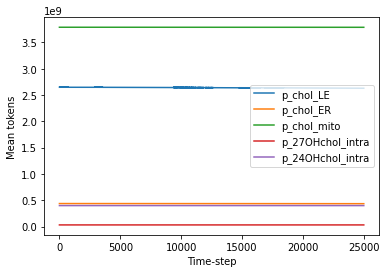

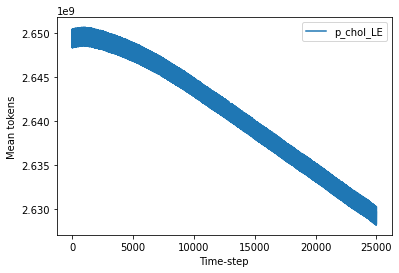

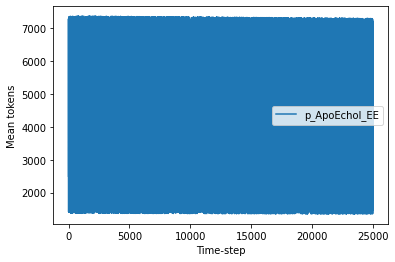

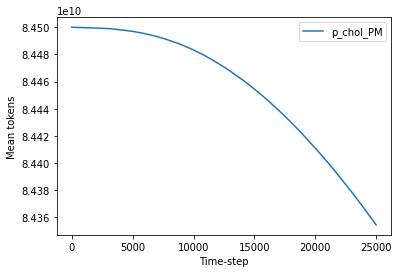

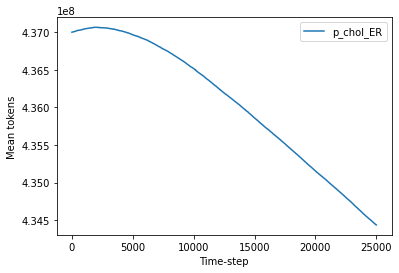

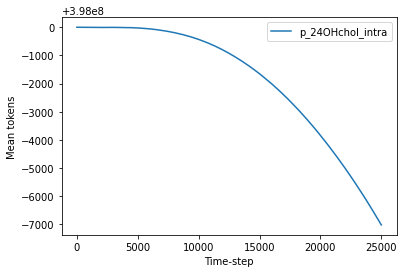

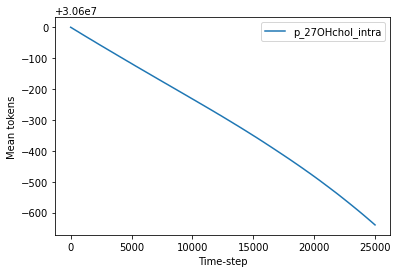

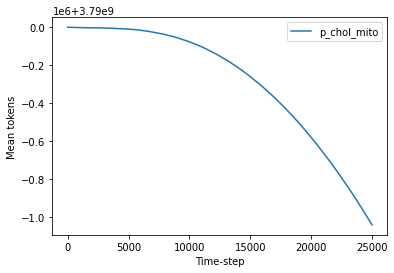

In [12]:
analysis = Analysis(pn)
import numpy as np
print(analysis.token_storage)
mean = np.mean(analysis.token_storage[:,50000:,analysis.place_dict["p_ApoEchol_EE"]])
print(mean)
analysis.mean_run_tokens_over_time(["p_chol_mito", "p_chol_LE","p_chol_ER", "p_27OHchol_intra", "p_24OHchol_intra"])
analysis.mean_run_tokens_over_time(["p_chol_LE"])
analysis.mean_run_tokens_over_time(["p_ApoEchol_EE"])
analysis.mean_run_tokens_over_time(["p_chol_PM"])
analysis.mean_run_tokens_over_time(["p_chol_ER"])
analysis.mean_run_tokens_over_time(["p_24OHchol_intra"])
analysis.mean_run_tokens_over_time(["p_27OHchol_intra"])
analysis.mean_run_tokens_over_time(["p_chol_mito"])




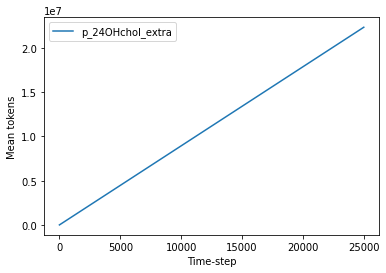

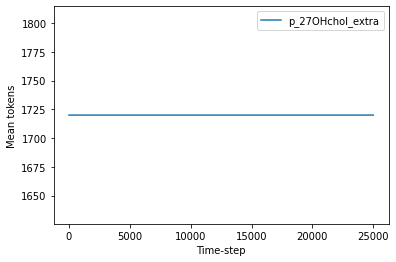

In [13]:
analysis.mean_run_tokens_over_time(["p_24OHchol_extra"])
analysis.mean_run_tokens_over_time(["p_27OHchol_extra"])

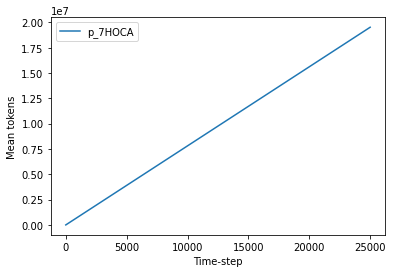

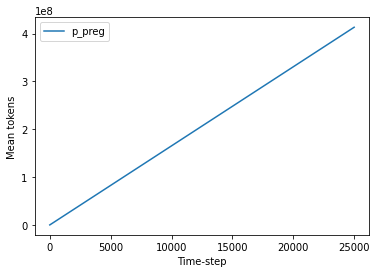

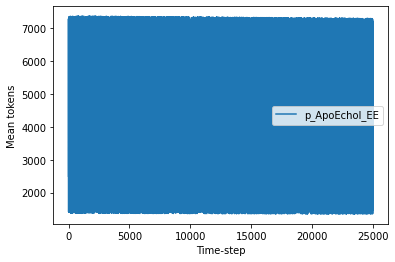

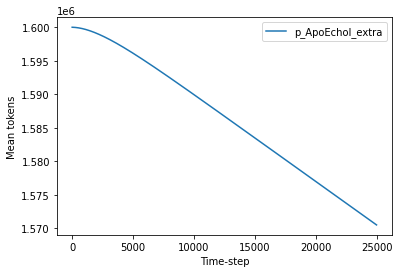

In [14]:
analysis.mean_run_tokens_over_time(["p_7HOCA"])
analysis.mean_run_tokens_over_time(["p_preg"])

analysis.mean_run_tokens_over_time(["p_ApoEchol_EE"])

analysis.mean_run_tokens_over_time(["p_ApoEchol_extra"])